In [26]:
import os
import numpy as np
import pandas as pd
import pathlib
import matplotlib.pyplot as plt

In [19]:
directory = '/camp/lab/znamenskiyp/home/shared/projects/turnerb_MAPseq/A1_MAPseq/FIAA32.6a/Sequencing/Processed_data/BC_split/temp'


In [39]:
dir_path = pathlib.Path(directory)
barcodefilerange = 96
value_counts = pd.DataFrame()
for i in range(barcodefilerange):
    os.chdir(directory)
    num = i + 1
    barcode = "BC%s" % num
    neuronfile = dir_path/f"neuronBCcorrected_{barcode}.csv"
    umifile = dir_path/f"UMIs_corrected_{barcode}.csv"
    if os.path.isfile(neuronfile) and os.path.isfile(umifile):
        print("processing %s" % barcode, flush=True)
        combined = pd.concat([pd.read_csv(neuronfile), pd.read_csv(umifile)], axis=1)
        combined["combined"] = (combined["corrected_neuronBC"] + combined["corrected_umi"])
        total_counts =combined['combined'].value_counts().rename_axis('sequence').reset_index(name='counts')
        value_counts = pd.concat([value_counts, total_counts])

processing BC1
processing BC2
processing BC3
processing BC4
processing BC5
processing BC6
processing BC7
processing BC8
processing BC9
processing BC10
processing BC11
processing BC12
processing BC13
processing BC14
processing BC15
processing BC16
processing BC17
processing BC18
processing BC19
processing BC20
processing BC21
processing BC22
processing BC23
processing BC24
processing BC25
processing BC26
processing BC27
processing BC28
processing BC29
processing BC30
processing BC31
processing BC32
processing BC33
processing BC34
processing BC37
processing BC38
processing BC39
processing BC40
processing BC41
processing BC42
processing BC43
processing BC44
processing BC45
processing BC46
processing BC47
processing BC48
processing BC49
processing BC50
processing BC51
processing BC52
processing BC53
processing BC54
processing BC55
processing BC56
processing BC58
processing BC59
processing BC60
processing BC61
processing BC62
processing BC63
processing BC66
processing BC67
processing BC68
p

In [23]:
total_counts =combined_samples['combined'].value_counts().rename_axis('sequence').reset_index(name='counts')

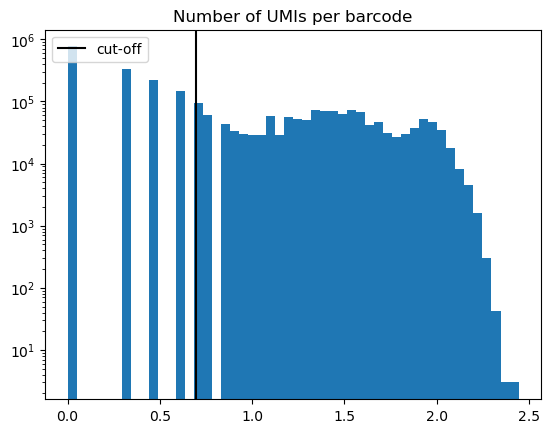

In [28]:
# Note this figure was used in Shirom Chabra's code to evaluate the UMI cut-off.
plt.hist(np.log(total_counts["counts"])/np.log(10), bins=50)
# plt.xticks(range(4),np.logspace(0,3,4))
plt.title('Number of UMIs per barcode', fontsize=12)
plt.yscale('log')
plt.axvline(x = np.log(2), color = "Black", label = "cut-off")
plt.legend(loc = 'upper left')

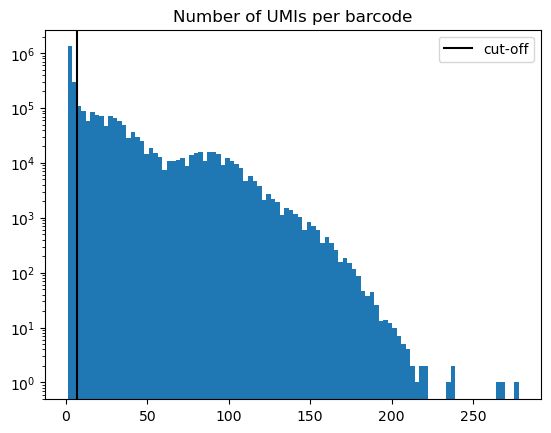

In [38]:
plt.hist(total_counts["counts"], bins=100)
# plt.xticks(range(4),np.logspace(0,3,4))
plt.title('Number of UMIs per barcode', fontsize=12)
plt.yscale('log')
plt.axvline(x = 7, color = "Black", label = "cut-off")
plt.legend(loc = 'upper right')

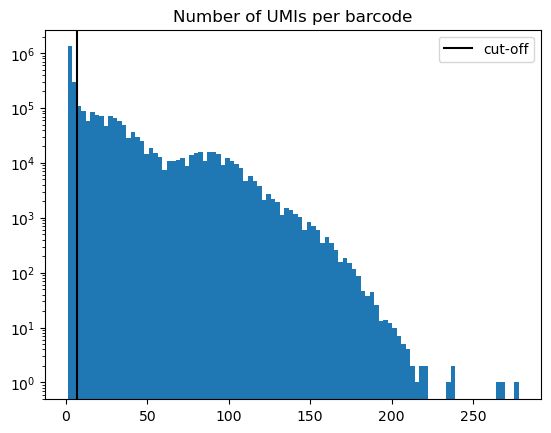

In [40]:
plt.hist(value_counts["counts"], bins=100)
# plt.xticks(range(4),np.logspace(0,3,4))
plt.title('Number of UMIs per barcode', fontsize=12)
plt.yscale('log')
plt.axvline(x = 7, color = "Black", label = "cut-off")
plt.legend(loc = 'upper right')

In [41]:
# set new file with cut-off as 7
def combineUMIandBC(directory, outdirectory, barcodefilerange=96):
    """
    Function to combine corrected barcodes and UMI's for each read and collect value counts.
    Also to detect degree of template switching between reads by seeing if UMI is shared by more than one barcode
    Also to split spike RNA from neuron barcodes, by whether contains N[24]ATCAGTCA (vs N[32]CTCT for neuron barcodes)
    Args:
        directory: temp file where the intermediate UMI and barcode clustered csv files are kept
        barcodefilerange: the number of samples you want to loop through (default set for 96)
    """
    os.chdir(directory)
    UMI_cutoff = 7
    for i in range(barcodefilerange):
        os.chdir(directory)
        num = i + 1
        barcode = "BC%s" % num
        neuronfile = "neuronBCcorrected_%s.csv" % barcode
        umifile = "UMIs_corrected_%s.csv" % barcode
        if os.path.isfile(neuronfile) and os.path.isfile(umifile):
            print("processing %s" % barcode, flush=True)
            combined = pd.concat(
                [pd.read_csv(neuronfile), pd.read_csv(umifile)], axis=1
            )
            combined["combined"] = (
                combined["corrected_neuronBC"] + combined["corrected_umi"]
            )
            spikein = combined[
                combined["combined"].str.contains("^.{24}ATCAGTCA") == True
            ].rename_axis("sequence")
            neurons = combined[
                combined["combined"].str.contains("^.{30}[CT][CT]") == True
            ].rename_axis("sequence")
            neuroncounts = (
                neurons["combined"]
                .value_counts()
                .rename_axis("sequence")
                .reset_index(name="counts")
            )
            counts_spike = (
                spikein["combined"]
                .value_counts()
                .rename_axis("sequence")
                .reset_index(name="counts")
            )
            # only take umi counts greater or equal to 2
            neuroncounts = neuroncounts[neuroncounts["counts"] >= UMI_cutoff]
            counts_spike = counts_spike[counts_spike["counts"] >= UMI_cutoff]
            counts_spike["barcode"] = counts_spike["sequence"].str[:32]
            neuroncounts["barcode"] = neuroncounts["sequence"].str[:32]
            spikeneuron = (
                counts_spike["barcode"]
                .value_counts()
                .rename_axis("sequence")
                .reset_index(name="counts")
            )
            neuroncounts = (
                neuroncounts["barcode"]
                .value_counts()
                .rename_axis("sequence")
                .reset_index(name="counts")
            )
            os.chdir(outdirectory)
            print("finished %s" % barcode, flush=True)
            tosaveBC = "neuroncounts_%s.csv" % barcode
            tosavespike = "spikecounts_%s.csv" % barcode
            spikeneuron.to_csv(tosavespike)
            neuroncounts.to_csv(tosaveBC)
        else:
            print("both not there for %s" % barcode)

In [ ]:
out_dir = dir_path.joinpath('increased_cutoff')
combineUMIandBC(directory=directory, outdirectory=out_dir, barcodefilerange=96)

processing BC1
finished BC1
processing BC2
finished BC2
processing BC3
finished BC3
processing BC4
finished BC4
processing BC5
finished BC5
processing BC6
finished BC6
processing BC7
finished BC7
processing BC8
finished BC8
processing BC9
finished BC9
processing BC10
finished BC10
processing BC11
finished BC11
processing BC12
finished BC12
processing BC13
finished BC13
processing BC14
finished BC14
processing BC15
finished BC15
processing BC16
finished BC16
processing BC17
finished BC17
processing BC18
finished BC18
processing BC19
finished BC19
processing BC20
finished BC20
processing BC21
finished BC21
processing BC22
finished BC22
processing BC23
finished BC23
processing BC24
finished BC24
processing BC25
finished BC25
processing BC26
finished BC26
processing BC27
finished BC27
processing BC28
finished BC28
processing BC29
finished BC29
processing BC30
finished BC30
processing BC31
finished BC31
processing BC32
finished BC32
processing BC33
finished BC33
processing BC34
finished BC3

In [44]:
directory

'/camp/lab/znamenskiyp/home/shared/projects/turnerb_MAPseq/A1_MAPseq/FIAA32.6a/Sequencing/Processed_data/BC_split/temp'